# Titanic Survial Prediction using LR

In [2]:
import pandas as pd

<h3><b>.The Titanic Survival Project is a research study that examines the factors that contributed to the survival<br>
of passengers aboard the Titanic during its fateful voyage in 1912. <br><br>.The project utilizes data analysis and machine learning techniques to explore the demographics, social status, and other characteristics of the passengers, as well as the circumstances of their rescue. <br><br>.The aim of this project is to gain insights into the patterns of survival and to identify the key factors that played a role in determining who survived and who did not. </b> </h3>


# Predicting Which Passenger Survived the Titanic 

This project is probably the rite of passage for everyone getting into data science. I never really enjoyed the movie, but the door could totally fit both Rose and Jack.

This project is binary classification problem, where the passenger either survived (`1`) or died (`0`). Here is a list of the columns of the dataset:

* `PassengerID` - Unique ID for each column
* `Survived` - Whether the passenger survived (1) or not (0)
* `Pclass` - Class of the passenger's ticket. Either 1, 2 or 3.
* `Sex` - Passenger's sex (male or female)
* `Age` - Passenger's age
* `Sibsp` - Number of sibling or spouses aboard the Titanic
* `Parch` - Number of parents or children aboard the Titanic
* `Ticket` - Passenger's ticket number
* `Fare` - The price paid for the passenger's ticket
* `Cabin` - Passenger's cabin number
* `Embarked` - Port where the passenger embarked. Can be:
    - `C` - Cherbourg
    - `Q` - Queenstown
    - `S` - Southampton

Although we know exactly who survived the Titanic, the project is still useful to apply important concepts in data science and machine learning. So here it is!

**Objective**: Predict which passenger survived the Titanic (Jack died)

**Techniques used:**

* Pandas, matplotlib, numpy
* Scikit-learn
* Logistic regression, cross-validation, k-nearest neighbours
* Regular expressions
* Heatmap
* Recursive feature elimination
* Hyperparameter optimization
* Grid search
* Random forest classifier



#### **(1) First we import dependencies for the project**


In [5]:
import numpy as np
import pandas as pd 
import os

In [6]:
train = pd.read_csv("C:/Users/abhis/OneDrive/Documents/GitHub/TiTanic_Survival_Prediction/dataset/train_data.csv")
test = pd.read_csv("C:/Users/abhis/OneDrive/Documents/GitHub/TiTanic_Survival_Prediction/dataset/test_data.csv")

##### **View the data in tablular format using Pandas 

In [7]:
print("Now showing train data")
train.head(10)


Now showing train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
print("Now showing test data")
test.head(10)

Now showing test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
train.info() # to get information about columns's data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.describe() #provides basic information about data like count avg of numberical columns

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# lets see percentage of missing data
missing = (train.isnull().count() - train.count()) / train.isnull().count() * 100
missing = pd.DataFrame(data = { 'original': train.isnull().count() , 'missing' : train.isnull().count() - train.count(), '%' : missing})
missing.sort_values(by= '%', ascending = False).head(3)

,original,missing,%
Cabin,891,687,77.104377
Age,891,177,19.865320
Embarked,891,2,0.224467


## Preliminary exploration of survival rate

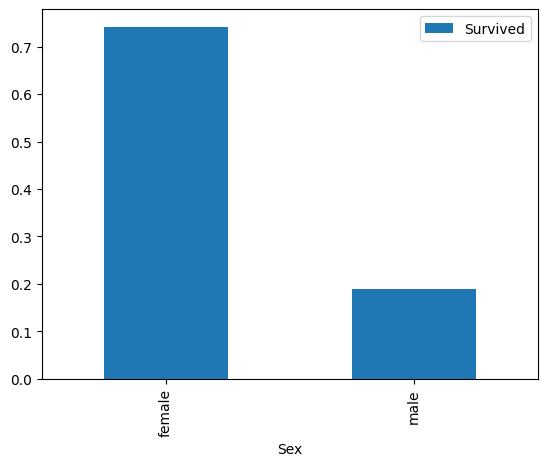

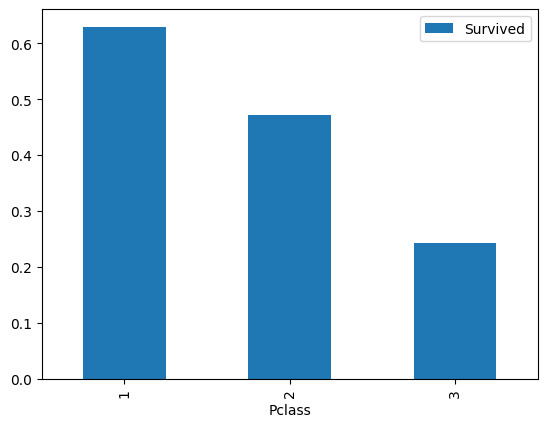

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

pclass_pivot = train.pivot_table(index = 'Pclass', values = 'Survived')
pclass_pivot.plot.bar()
plt.show()



### **This shows that female and 1st class passenger have better chance at survial**

## Turn age into a category

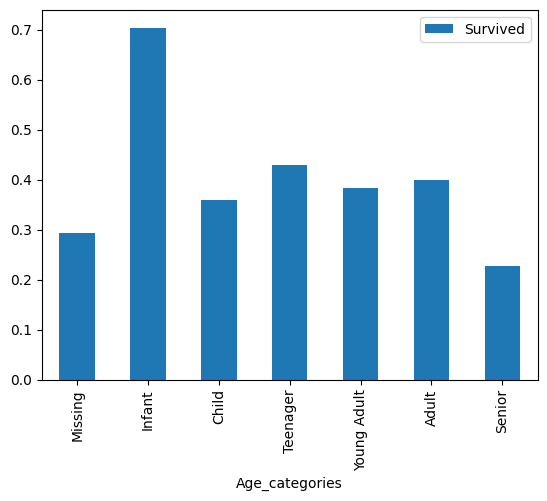

In [13]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()



### Create dummies

In [14]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")



## Logistic Regression

In [15]:
holdout = test # from now on we will refer to this dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print("Accuracy of the quick Logistic Model is")
print(round(accuracy*100,5),'%')



Accuracy of the quick Logistic Model is
81.00559 %


## Feature Selection  

##### for best selection of attribute for the model

In [17]:
from sklearn.preprocessing import minmax_scale
# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())

train['Embarked'] = train['Embarked'].fillna('S')
holdout['Embarked'] = holdout['Embarked'].fillna('S')

train = create_dummies(train, 'Embarked')
holdout = create_dummies(holdout, 'Embarked')

cols = ['SibSp', 'Parch', 'Fare']

for col in cols:
    train[col + "_scaled"] = minmax_scale(train[col])
    holdout[col + "_scaled"] = minmax_scale(holdout[col])

### Checking the factor of importance for best feature selection 

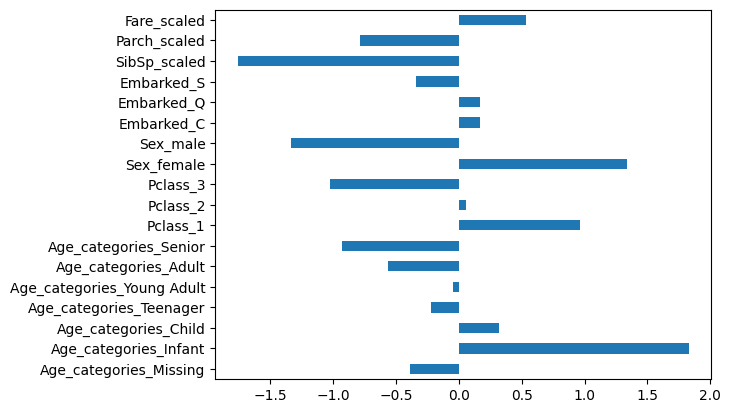

In [18]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index = train[columns].columns)

feature_importance.plot.barh()
plt.show()



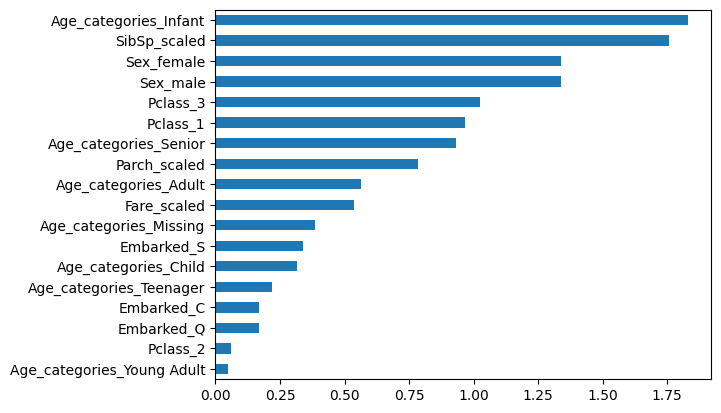

In [19]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()
# for ease for comparing and viewing 


## Cross-Validation and Other metrics

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv = 10)
accuracy = np.mean(scores)
print(accuracy)

0.8024719101123596


## K-Nearest neighbours accuracy score

In [21]:


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn, all_X, all_y, cv = 10)
accuracy_knn = scores.mean()

print(accuracy_knn)



0.7375280898876404


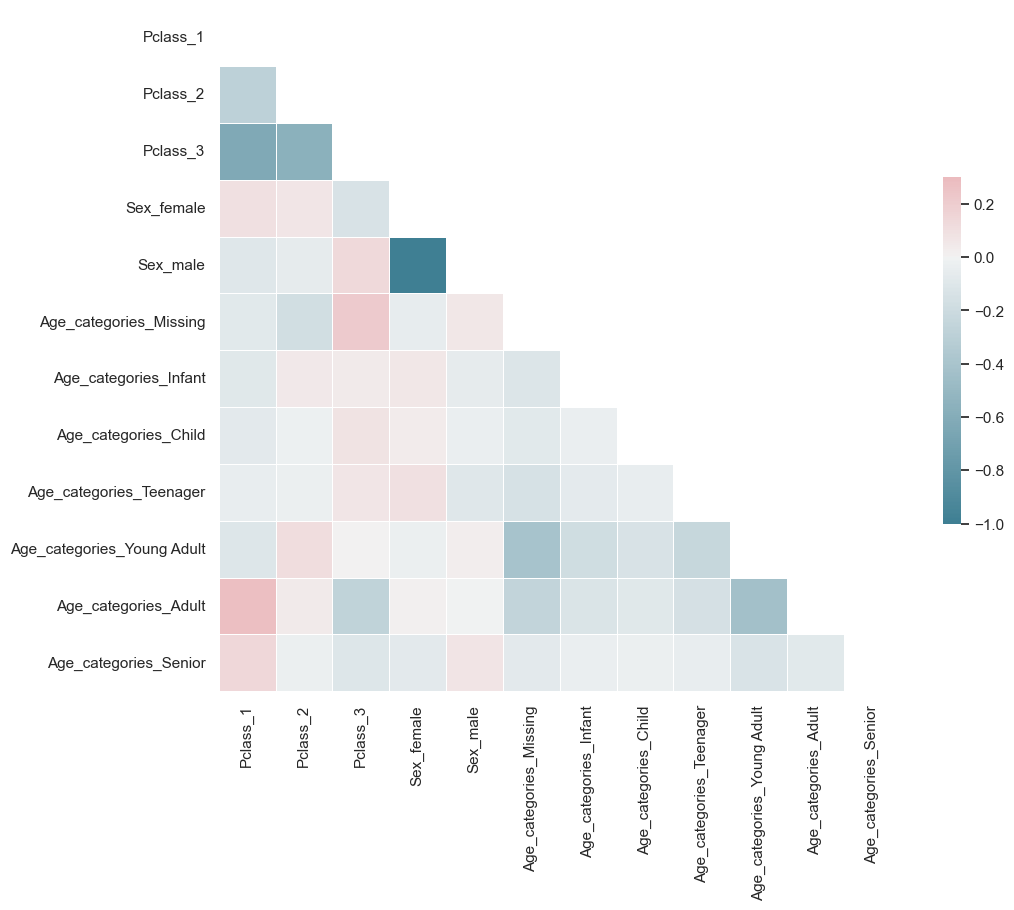

In [26]:
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

plot_correlation_heatmap(train[columns])

## Hyperparameter optimization on k-nearest neighbours

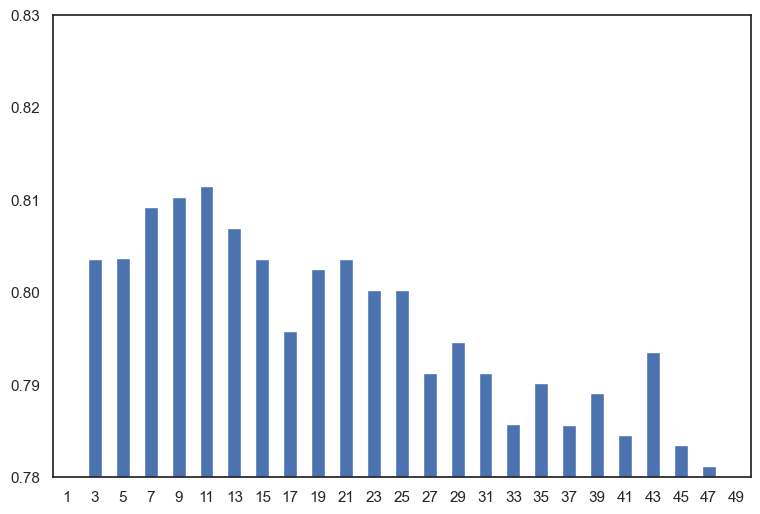

In [23]:


def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, all_X, all_y, cv = 10)
    accuracy_knn = scores.mean()
    knn_scores[k] = accuracy_knn
    
plot_dict(knn_scores)



## Random forest classifier score

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 1)
scores = cross_val_score(clf, all_X, all_y, cv = 10)
accuracy_rf = scores.mean()

print(accuracy_rf*100,"%")

79.2421972534332 %


## Using GrideSearchCV to "fit" and "score"

In [25]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state = 1)

hyperparameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [3, 5],
    'n_estimators': [6, 9]
}

grid = GridSearchCV(clf, param_grid = hyperparameters, cv = 10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)



{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}
0.8170411985018726


# Thank you !